# <font style="color:red;">Real Estate Price Predictor Land</font>

## Import các thư viện sử dụng

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
pd.options.mode.chained_assignment = None

## Import File Dataset csv Land

In [219]:
#typeNameAll = ['dat-dat-nen']
#folderNameAll = ['HCM_T5','HaNoi_T5']
typeName = 'dat-dat-nen'
folderName = 'HaNoi_T5'
df1 = pd.read_csv("./Clean_Data/" + folderName + "/" + typeName + "_" + folderName + "_all.csv")
df1.head(5)

,productId,url,date,price,area,pricePerM2,type,provinceId,districtId,wardId,districtName
0,39494379,https://batdongsan.com.vn/ban-dat-dat-nen-ba-d...,2024-05-10,27900.0,140.0,199.29,dat-dat-nen,HN,2,61,ba-dinh
1,39070284,https://batdongsan.com.vn/ban-dat-dat-nen-ba-d...,2024-05-10,18500.0,95.0,194.74,dat-dat-nen,HN,2,66,ba-dinh
2,39758040,https://batdongsan.com.vn/ban-dat-dat-nen-ba-d...,2024-05-10,23000.0,201.0,114.43,dat-dat-nen,HN,2,72,ba-dinh
3,39709558,https://batdongsan.com.vn/ban-dat-dat-nen-ba-d...,2024-05-10,7950.0,52.0,152.88,dat-dat-nen,HN,2,59,ba-dinh
4,38863146,https://batdongsan.com.vn/ban-dat-dat-nen-ba-d...,2024-05-10,2600.0,75.0,34.67,dat-dat-nen,HN,2,59,ba-dinh


In [220]:
df1.shape

(7849, 11)

Dưới đây là một số thông tin cơ bản về tập dữ liệu

In [221]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7849 entries, 0 to 7848
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productId     7849 non-null   int64  
 1   url           7849 non-null   object 
 2   date          7849 non-null   object 
 3   price         7849 non-null   float64
 4   area          7849 non-null   float64
 5   pricePerM2    7849 non-null   float64
 6   type          7849 non-null   object 
 7   provinceId    7849 non-null   object 
 8   districtId    7849 non-null   int64  
 9   wardId        7849 non-null   int64  
 10  districtName  7849 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 674.6+ KB


Group the dataframe by its districtName and find its count.

In [222]:
df2 = df1.drop(['productId', 'url', 'type', 'date', 'districtId', 'provinceId', 'wardId'], axis='columns')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7849 entries, 0 to 7848
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7849 non-null   float64
 1   area          7849 non-null   float64
 2   pricePerM2    7849 non-null   float64
 3   districtName  7849 non-null   object 
dtypes: float64(3), object(1)
memory usage: 245.4+ KB


Tiến hành loại bỏ các cột không cần thiết, các giá trị null

In [223]:
df2 = df2.dropna()
df2.shape

(7849, 4)

Xem một số thông tin liên quan đến quận huyện và gộp nhóm chúng

In [224]:
# Group by 'district_name' and count occurrences
district_counts = df2.groupby('districtName')['districtName'].agg('count')

# Filter out districts with fewer than 100 entries
valid_districts = district_counts[district_counts >= 100].index

# Create a new DataFrame with only the valid districts
df2 = df2[df2['districtName'].isin(valid_districts)]

In [225]:
df2.groupby('districtName')['districtName'].agg('count')

districtName
ba-vi          148
bac-tu-liem    350
cau-giay       135
chuong-my      303
dan-phuong     107
dong-anh       816
gia-lam        617
ha-dong        626
hoai-duc       556
hoang-mai      188
long-bien      949
me-linh        208
nam-tu-liem    251
quoc-oai       347
soc-son        391
son-tay        124
tay-ho         332
thach-that     496
thanh-oai      125
thanh-tri      198
Name: districtName, dtype: int64

## Xử lí các giá trị outlier

In [226]:
df3 = df2.copy()
df3.shape

(7267, 4)

In [227]:
# Group by 'district_name' and apply 'describe' on 'pricePerM2'
grouped_stats = df3.groupby('districtName')['pricePerM2'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
districtName,,,,,,,,
ba-vi,148.0,19.226014,56.797776,1.20,2.9700,5.050,13.3225,489.90
bac-tu-liem,350.0,103.857486,71.118995,3.00,65.0000,93.400,120.0000,996.00
cau-giay,135.0,209.496667,123.489365,34.67,130.1500,170.940,269.2600,600.00
chuong-my,303.0,25.550528,17.261965,1.73,10.8550,24.000,34.6700,80.00
dan-phuong,107.0,47.229346,20.696917,4.50,32.3250,44.870,56.1500,102.00
dong-anh,816.0,58.901115,27.452582,10.00,40.8750,52.665,66.3550,272.73
gia-lam,617.0,62.792123,33.283079,7.00,40.0000,53.010,70.5900,298.51
ha-dong,626.0,115.294153,66.775562,22.48,63.0000,104.645,157.4425,350.00
hoai-duc,556.0,73.630036,35.790856,2.00,45.0000,72.000,97.0000,297.10


There appears to be a huge difference between the min and max values for price_per_sqft column. That needs to be fixed.

In [228]:
Q1 = df3['pricePerM2'].quantile(0.2)
Q3 = df3['pricePerM2'].quantile(0.75)
IQR = Q3 - Q1

df4 = df3[(df3['pricePerM2'] >= Q1) & (df3['pricePerM2'] <= Q3)]

In [229]:
# Group by 'district_name' and apply 'describe' on 'pricePerM2'
grouped_stats = df4.groupby('districtName')['pricePerM2'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
districtName,,,,,,,,
ba-vi,27.0,45.544444,15.095466,26.00,34.6700,34.670,64.2900,64.29
bac-tu-liem,209.0,70.210670,19.625354,25.00,60.3300,67.740,85.4600,103.18
cau-giay,23.0,61.087826,23.216479,34.67,34.6700,64.290,72.7300,100.00
chuong-my,143.0,39.885664,13.795805,24.76,29.7500,34.670,46.0000,80.00
dan-phuong,93.0,51.433978,18.795177,26.67,34.6700,50.000,64.2900,102.00
dong-anh,763.0,55.147405,18.040016,25.00,40.8400,52.000,64.2900,103.00
gia-lam,516.0,52.378992,17.025022,24.88,39.1275,50.000,64.2900,102.86
ha-dong,305.0,59.880033,19.687086,25.00,41.4200,63.000,72.0000,101.92
hoai-duc,432.0,63.778634,22.846303,25.00,42.5325,65.000,85.0000,103.59


## Trực quan hoá dữ liệu

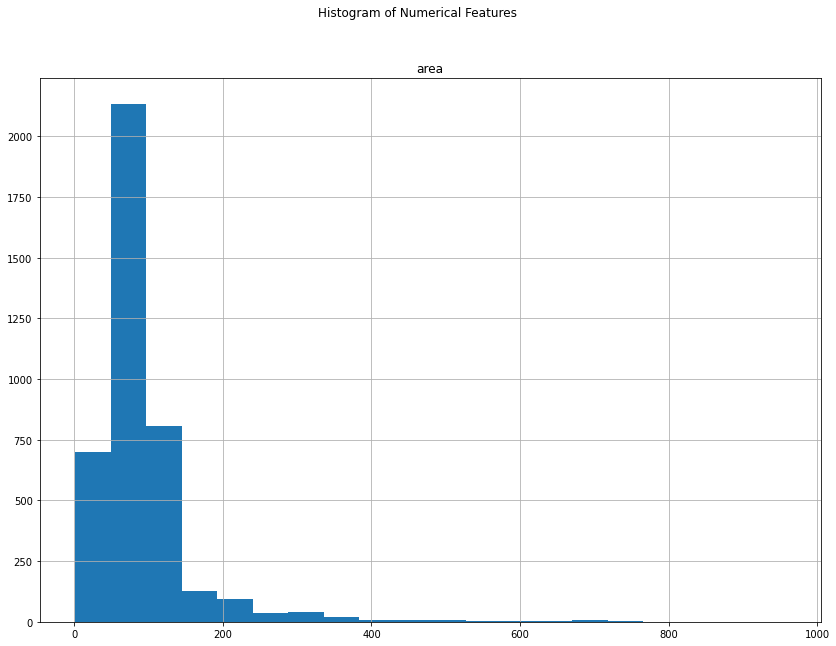

In [230]:
numerical_features = ['area']
df4[numerical_features].hist(bins=20, figsize=(14,10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

Text(0, 0.5, 'Count')

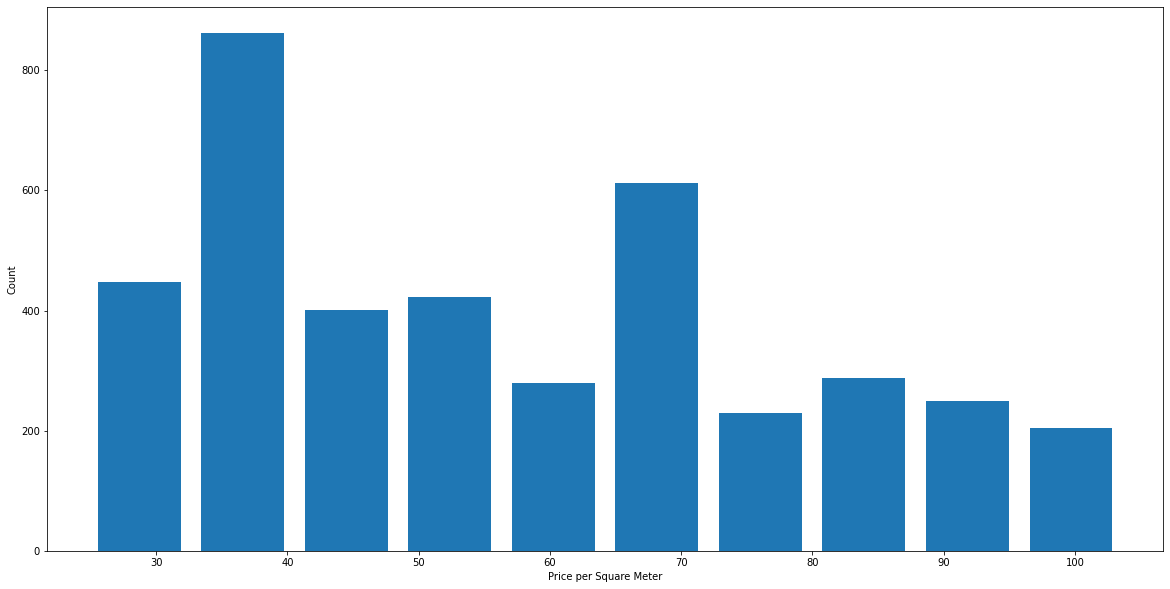

In [231]:
plt.hist(df4.pricePerM2, rwidth=0.8)
plt.xlabel('Price per Square Meter')
plt.ylabel('Count')

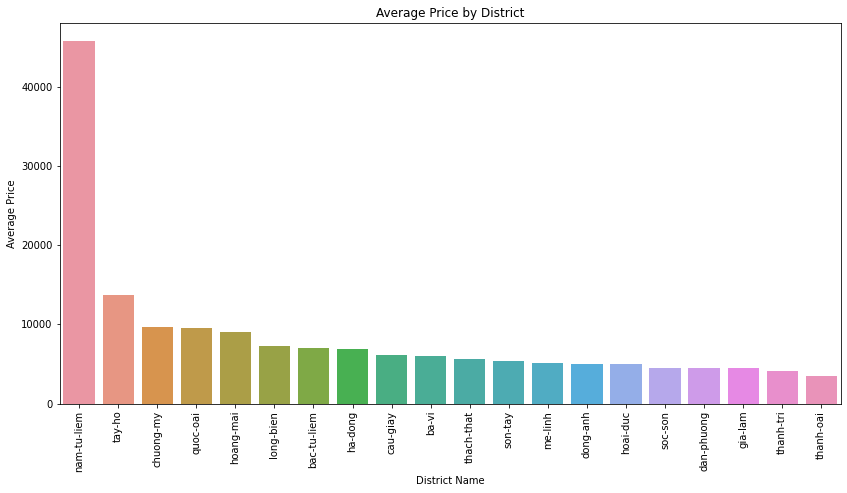

In [232]:
plt.figure(figsize=(14,7))
avg_price_by_district = df4.groupby('districtName')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.index, y=avg_price_by_district.values)
plt.title('Average Price by District')
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Average Price')
plt.show()

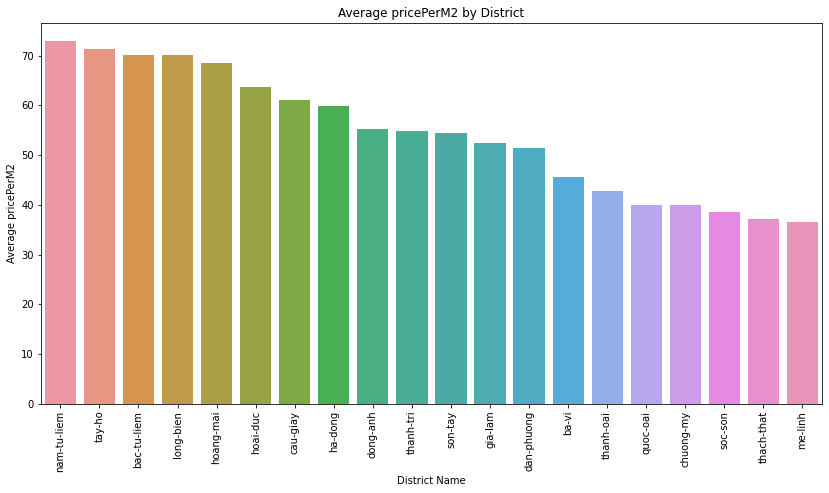

In [233]:
plt.figure(figsize=(14,7))
avg_price_by_district = df4.groupby('districtName')['pricePerM2'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_district.index, y=avg_price_by_district.values)
plt.title('Average pricePerM2 by District')
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Average pricePerM2')
plt.show()

## Chuẩn bị dữ liệu cho mô hình học máy

In [234]:
df5 = df4.drop(['pricePerM2'], axis='columns')

Đưa cột districtName thành từng cột biến phân loại

In [235]:
dummies = pd.get_dummies(df5.districtName)
dummies.head()

,ba-vi,bac-tu-liem,cau-giay,chuong-my,dan-phuong,dong-anh,gia-lam,ha-dong,hoai-duc,hoang-mai,long-bien,me-linh,nam-tu-liem,quoc-oai,soc-son,son-tay,tay-ho,thach-that,thanh-oai,thanh-tri
86,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
df6 = pd.concat([df5, dummies], axis='columns') # Append df10 and dummies dataframe
df6.head()

,price,area,districtName,ba-vi,bac-tu-liem,cau-giay,chuong-my,dan-phuong,dong-anh,gia-lam,...,long-bien,me-linh,nam-tu-liem,quoc-oai,soc-son,son-tay,tay-ho,thach-that,thanh-oai,thanh-tri
86,2600.0,75.0,ba-vi,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,8350.0,183.0,ba-vi,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,9000.0,140.0,ba-vi,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,2600.0,75.0,ba-vi,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,8150.0,240.0,ba-vi,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
df7 = df6.drop('districtName', axis='columns')
df7.head()

,price,area,ba-vi,bac-tu-liem,cau-giay,chuong-my,dan-phuong,dong-anh,gia-lam,ha-dong,...,long-bien,me-linh,nam-tu-liem,quoc-oai,soc-son,son-tay,tay-ho,thach-that,thanh-oai,thanh-tri
86,2600.0,75.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,8350.0,183.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,9000.0,140.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,2600.0,75.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,8150.0,240.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
X = df7.drop('price', axis='columns')
y = df7.price
y.head()

86     2600.0
89     8350.0
90     9000.0
100    2600.0
102    8150.0
Name: price, dtype: float64

## Import thư viện cho các mô hình

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# có thể thêm Random Forest, SVR, Ada Boost, Ridge
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Chuyển đổi khai báo các cột phân loại và cột liên tục

In [240]:
# Xác định các cột phân loại và cột liên tục
numerical_features = ['area']
categorical_features = [col for col in df7.columns if col not in numerical_features + ['price']]

# Tạo các transformer cho các cột phân loại và liên tục
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Tạo ColumnTransformer để tiền xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Tiến hành huấn luyện sơ lược các mô hình hộc máy

In [241]:
# Khởi tạo các mô hình
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Lasso())])

decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor())])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor())])

gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', GradientBoostingRegressor())])

svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])

ada_boost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', AdaBoostRegressor())])

# Huấn luyện các mô hình
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
ada_boost_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_ada_boost = ada_boost_model.predict(X_test)

# Tính toán các phép đo đánh giá cho Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R²: {r2_linear}')

# Tính toán các phép đo đánh giá cho Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}')

# Tính toán các phép đo đánh giá cho Decision Tree
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(f'Decision Tree - MAE: {mae_decision_tree}, MSE: {mse_decision_tree}, RMSE: {rmse_decision_tree}, R²: {r2_decision_tree}')

# Tính toán các phép đo đánh giá cho Random Forest
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print(f'Random Forest - MAE: {mae_random_forest}, MSE: {mse_random_forest}, RMSE: {rmse_random_forest}, R²: {r2_random_forest}')

# Tính toán các phép đo đánh giá cho Gradient Boosting
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print(f'Gradient Boosting - MAE: {mae_gradient_boosting}, MSE: {mse_gradient_boosting}, RMSE: {rmse_gradient_boosting}, R²: {r2_gradient_boosting}')

# Tính toán các phép đo đánh giá cho SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - MAE: {mae_svr}, MSE: {mse_svr}, RMSE: {rmse_svr}, R²: {r2_svr}')

# Tính toán các phép đo đánh giá cho Ada Boost
mae_ada_boost = mean_absolute_error(y_test, y_pred_ada_boost)
mse_ada_boost = mean_squared_error(y_test, y_pred_ada_boost)
rmse_ada_boost = np.sqrt(mse_ada_boost)
r2_ada_boost = r2_score(y_test, y_pred_ada_boost)

print(f'Ada Boost - MAE: {mae_ada_boost}, MSE: {mse_ada_boost}, RMSE: {rmse_ada_boost}, R²: {r2_ada_boost}')


Linear Regression - MAE: 5463.315315315315, MSE: 1032697180.004004, RMSE: 32135.606109174354, R²: 0.005819728001320912
Lasso Regression - MAE: 5524.084929069502, MSE: 1033611051.3385744, RMSE: 32149.82194878495, R²: 0.004939941681025628
Decision Tree - MAE: 1606.276907383036, MSE: 148496977.52372015, RMSE: 12185.933592618998, R²: 0.8570415719495414
Random Forest - MAE: 1229.9892332168981, MSE: 22083888.434192646, RMSE: 4699.34978844868, R²: 0.9787397829340359
Gradient Boosting - MAE: 1819.0380834727134, MSE: 124390690.34817266, RMSE: 11153.057443955566, R²: 0.8802487575651458
SVR - MAE: 4242.586275018634, MSE: 1048869173.120115, RMSE: 32386.24975387109, R²: -0.009749092003468629
Ada Boost - MAE: 3730.4024938755665, MSE: 219400932.81661814, RMSE: 14812.188657204517, R²: 0.7887821490288724


In [121]:

# Sử dụng cross-validation để đánh giá mô hình Linear Regression với MAE
cv_mae_linear = -cross_val_score(linear_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Linear Regression - Mean CV MAE: {cv_mae_linear}')

# Sử dụng cross-validation để đánh giá mô hình Lasso Regression với MAE
cv_mae_lasso = -cross_val_score(lasso_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Lasso Regression - Mean CV MAE: {cv_mae_lasso}')

# Sử dụng cross-validation để đánh giá mô hình Decision Tree với MAE
cv_mae_decision_tree = -cross_val_score(decision_tree_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Decision Tree - Mean CV MAE: {cv_mae_decision_tree}')

# Sử dụng cross-validation để đánh giá mô hình Random Forest với MAE
cv_mae_random_forest = -cross_val_score(random_forest_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Random Forest - Mean CV MAE: {cv_mae_random_forest}')

# Sử dụng cross-validation để đánh giá mô hình Gradient Boosting với MAE
cv_mae_gradient_boosting = -cross_val_score(gradient_boosting_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Gradient Boosting - Mean CV MAE: {cv_mae_gradient_boosting}')

# Sử dụng cross-validation để đánh giá mô hình SVR với MAE
cv_mae_svr = -cross_val_score(svr_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'SVR - Mean CV MAE: {cv_mae_svr}')

# Sử dụng cross-validation để đánh giá mô hình Ada Boost với MAE
cv_mae_ada_boost = -cross_val_score(ada_boost_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'Ada Boost - Mean CV MAE: {cv_mae_ada_boost}')

Linear Regression - Mean CV MAE: 7.225101773412622e+16
Lasso Regression - Mean CV MAE: 10411.162079870139
Decision Tree - Mean CV MAE: 4660.003604384108
Random Forest - Mean CV MAE: 4137.353093590706
Gradient Boosting - Mean CV MAE: 4176.7007791681335
SVR - Mean CV MAE: 8426.600714333548
Ada Boost - Mean CV MAE: 5451.338932262215


## Phân tích và đề xuất

### Decision Tree:

Có R² cao nhất, điều này cho thấy mô hình này giải thích được phần lớn sự biến thiên trong dữ liệu.

Tuy nhiên, Mean CV MAE của Decision Tree là cao nhất, điều này cho thấy mô hình có thể bị overfitting với tập huấn luyện và không tổng quát tốt cho dữ liệu mới.

### Gradient Boosting:

Có Mean CV MAE thấp nhất, cho thấy khả năng tổng quát hóa tốt hơn so với Decision Tree.

Tuy nhiên, R² của Gradient Boosting thấp hơn Decision Tree một chút.

### Random Forest:

Có Mean CV MAE gần tương đương với Gradient Boosting.

Tuy nhiên, MSE và RMSE của Random Forest là cao nhất và R² là thấp nhất, điều này cho thấy mô hình này không phù hợp bằng hai mô hình còn lại cho bài toán này.

### Kết luận:
Nếu ưu tiên khả năng tổng quát hóa (cross-validation MAE thấp), Gradient Boosting là sự lựa chọn tốt nhất. Đồng thời tránh khả năng bị overfitting trên tập kiểm tra hiện tại so với Decision Tree.

## Tối ưu các mô hình học máy tốt nhất

In [55]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các siêu tham số cho Decision Tree
param_grid_decision_tree = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Định nghĩa các siêu tham số cho Gradient Boosting
param_grid_gradient_boosting = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Tạo các pipeline cho Decision Tree và Gradient Boosting
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor(random_state=42))])

gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', GradientBoostingRegressor(random_state=42))])

# Thực hiện Grid Search cho Decision Tree
grid_search_decision_tree = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_decision_tree,
                                         scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)
grid_search_decision_tree.fit(X_train, y_train)

# Thực hiện Grid Search cho Gradient Boosting
grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid_gradient_boosting,
                                             scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)
grid_search_gradient_boosting.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất và các giá trị MAE tốt nhất cho cả hai mô hình
print(f"Best parameters for Decision Tree: {grid_search_decision_tree.best_params_}")
print(f"Best MAE for Decision Tree: {-grid_search_decision_tree.best_score_}")

print(f"Best parameters for Gradient Boosting: {grid_search_gradient_boosting.best_params_}")
print(f"Best MAE for Gradient Boosting: {-grid_search_gradient_boosting.best_score_}")

# Dự đoán và đánh giá mô hình tốt nhất cho Decision Tree
best_decision_tree_model = grid_search_decision_tree.best_estimator_
y_pred_best_decision_tree = best_decision_tree_model.predict(X_test)
mae_best_decision_tree = mean_absolute_error(y_test, y_pred_best_decision_tree)
mse_best_decision_tree = mean_squared_error(y_test, y_pred_best_decision_tree)
rmse_best_decision_tree = np.sqrt(mse_best_decision_tree)
r2_best_decision_tree = r2_score(y_test, y_pred_best_decision_tree)

print(f'Best Decision Tree - MAE: {mae_best_decision_tree}, MSE: {mse_best_decision_tree}, RMSE: {rmse_best_decision_tree}, R²: {r2_best_decision_tree}')

# Dự đoán và đánh giá mô hình tốt nhất cho Gradient Boosting
best_gradient_boosting_model = grid_search_gradient_boosting.best_estimator_
y_pred_best_gradient_boosting = best_gradient_boosting_model.predict(X_test)
mae_best_gradient_boosting = mean_absolute_error(y_test, y_pred_best_gradient_boosting)
mse_best_gradient_boosting = mean_squared_error(y_test, y_pred_best_gradient_boosting)
rmse_best_gradient_boosting = np.sqrt(mse_best_gradient_boosting)
r2_best_gradient_boosting = r2_score(y_test, y_pred_best_gradient_boosting)

print(f'Best Gradient Boosting - MAE: {mae_best_gradient_boosting}, MSE: {mse_best_gradient_boosting}, RMSE: {rmse_best_gradient_boosting}, R²: {r2_best_gradient_boosting}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Decision Tree: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Best MAE for Decision Tree: 3143.016789035275
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Best MAE for Gradient Boosting: 2905.8916183670103
Best Decision Tree - MAE: 2552.9781331554486, MSE: 112768477.56125417, RMSE: 10619.250329531467, R²: 0.7327120412789825
Best Gradient Boosting - MAE: 2205.208011532212, MSE: 56748148.18564674, RMSE: 7533.136676421499, R²: 0.8654934692941983


## Tiến hành dự đoán thử nghiệm độ chính xác

Khai báo hàm predict_price để sử dụng cho dự đoán giá bất động sản

In [56]:
def predict_price(districtName, area):
    loc_index = np.where(X.columns == districtName)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = area
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    x_df = pd.DataFrame([x], columns=X.columns)
    
    return best_gradient_boosting_model.predict(x_df)[0]

Một số dự đoán thử nghiệm

In [57]:
sample = df5.sample()
print("Khu vực: " + sample['districtName'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))
print("Giá dự đoán: " + 
    str(predict_price(
        sample['districtName'].values[0], 
        sample['area'].values[0]
        )
    )
)

Khu vực: quan-12
Diện tích: 160.0
Giá gốc: 8000.0
Giá dự đoán: 7046.221516584062


In [58]:
sample = df5.sample()
print("Khu vực: " + sample['districtName'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))
print("Giá dự đoán: " + 
    str(predict_price(
        sample['districtName'].values[0], 
        sample['area'].values[0]
        )
    )
)

Khu vực: quan-12
Diện tích: 72.0
Giá gốc: 3950.0
Giá dự đoán: 4256.439009637327


In [59]:
sample = df5.sample()
print("Khu vực: " + sample['districtName'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))
print("Giá dự đoán: " + 
    str(predict_price(
        sample['districtName'].values[0], 
        sample['area'].values[0]
        )
    )
)

Khu vực: quan-12
Diện tích: 67.5
Giá gốc: 2650.0
Giá dự đoán: 3138.411672315993


In [60]:
sample = df5.sample()
print("Khu vực: " + sample['districtName'].values[0])
print("Diện tích: " + str(sample['area'].values[0]))
print("Giá gốc: " + str(sample['price'].values[0]))
print("Giá dự đoán: " + 
    str(predict_price(
        sample['districtName'].values[0], 
        sample['area'].values[0]
        )
    )
)

Khu vực: nha-be
Diện tích: 90.0
Giá gốc: 4000.0
Giá dự đoán: 4610.954858728887


## Xuất mô hình học máy để ứng dụng

Hàm xuất file mô hình học máy định đạng pickle

In [61]:
import pickle
with open( folderName + '_' + typeName + '_T5_2024_ML.pickle', 'wb') as f:
    pickle.dump(best_gradient_boosting_model, f)
accuracy = best_gradient_boosting_model.score(X_test, y_test)

Hàm xuất file dữ liệu json liên quan đến mô hình

In [62]:
import json
# Split columns into data_columns and district_columns
all_columns = [col.lower() for col in X.columns]
data_columns = all_columns[:1]
district_columns = all_columns[1:]

# Create the dictionary
columns = {
    'model': folderName,
    'type': typeName,
    'data_columns': data_columns,
    'district_columns': district_columns,
    'model_accuracy': accuracy
}

with open(folderName + '_columns_'+ typeName + '.json', 'w') as f:
    f.write(json.dumps(columns))